# Gradient Descent

In [75]:
import numpy as np 
import matplotlib.pyplot as plt 

### Dataset

In [76]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

### Cost function

$$ J(w, b) = \frac{1}{2n} \sum_{i=0}^{n-1} (f_{w, b}(x^{(i)}) - y^{(i)})^2$$

In [77]:
def compute_cost(x, y, w, b):
    """ 
    Computes the cost function for linear regression
    Args:
        x (ndarray (n,)): input variables, n examples
        y (ndarray (n,)): target values
        w, b (scalar): model parameters
    Returns:
        cost (float): the cost for linear regression
    """
    n = x.shape[0]
    cost = 0.0

    for i in range(n):
        f = w * x[i] + b
        cost += (f - y[i]) ** 2
    
    cost *= 1 / (2 * n)

    return cost

### Gradient descent

$$
\begin{align*}
\text{repeat util} &\text{ convergence:} \; \lbrace \\
\; w &:= w - \alpha \frac{\partial J(w, b)}{\partial w} \\
\; b &:= b - \alpha \frac{\partial J(w, b)}{\partial b} \\
\rbrace
\end{align*}
$$

where

$$
\begin{align*}
\frac{\partial J(w, b)}{\partial w} &= \frac{1}{n} \sum_{i=0}^{n-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \\
\frac{\partial J(w, b)}{\partial b} &= \frac{1}{n} \sum_{i=0}^{n-1} (f_{w,b}(x^{(i)}) - y^{(i)})
\end{align*}
$$

In [78]:
def compute_gradient(x, y, w, b):
    """ 
    Computes the gradient of the cost J wrt model parameters w, b for linear regression
    Args:
        x (ndarray(n,)) : input variables, n examples
        y (ndarray(n,)) : target values
        w, b (scalar)   : model parameters
    Returns
        dJ_dw (scalar)  : the gradient of the cost wrt w
        dJ_db (scalar)  : the gradient of the cost wrt b
    """
    n = x.shape[0]
    dJ_dw = 0
    dJ_db = 0

    for i in range(n):
        f = w * x[i] + b
        dJ_dw += (f - y[i]) * x[i]
        dJ_db += f - y[i]

    dJ_dw *= 1 / n
    dJ_db *= 1 / n
    
    return dJ_dw, dJ_db


In [79]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters):
    """ 
    Performs gradient descent to fit w, b. Updates w, b by taking num_iters 
    gradient steps with learning rate alpha
    Args:
        x (ndarray(n,))     : input variables, n examples
        y (ndarray(n,))     : target values
        w_in, b_in (scalar) : intial values of model parameters
        alpha (float)       : learning rate
        num_iters (int)     : number of iterations to run gradient descent
    Returns:
        w, b (scalar)       : updated value of model parameters after running 
                            gradient descent
        J_hist (list)       : history of cost values
    """
    J_hist = []
    w = w_in
    b = b_in
    for i in range(num_iters):
        dJ_dw, dJ_db = compute_gradient(x, y, w, b)

        w -= alpha * dJ_dw
        b -= alpha * dJ_db

        J_hist.append(compute_cost(x, y, w, b))

        if i % (num_iters / 10) == 0:
            print(f"Iteration {i:4}: Cost = {J_hist[i]:0.2e} ",
                  f"dJ_dw: {dJ_dw: 0.3e}, dJ_db: {dJ_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
            
    return w, b, J_hist


In [80]:
w_init = 0
b_init = 0
iterations = 10000
tmp_alpha = 1.0e-2

w_final, b_final, J_history = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations)
print(f"(w, b) found by gradient descent: ({w_final:8.4f}, {b_final:8.4f})")

Iteration    0: Cost = 7.93e+04  dJ_dw: -6.500e+02, dJ_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost = 3.41e+00  dJ_dw: -3.712e-01, dJ_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost = 7.93e-01  dJ_dw: -1.789e-01, dJ_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost = 1.84e-01  dJ_dw: -8.625e-02, dJ_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost = 4.28e-02  dJ_dw: -4.158e-02, dJ_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost = 9.95e-03  dJ_dw: -2.004e-02, dJ_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost = 2.31e-03  dJ_dw: -9.660e-03, dJ_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost = 5.37e-04  dJ_dw: -4.657e-03, dJ_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost = 1.25e-04  dJ_dw: -2.245e-03, dJ_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost = 2.90e-05  dJ_dw: -1.082e-03, dJ_db:  1.751e-03   w:  2.000e

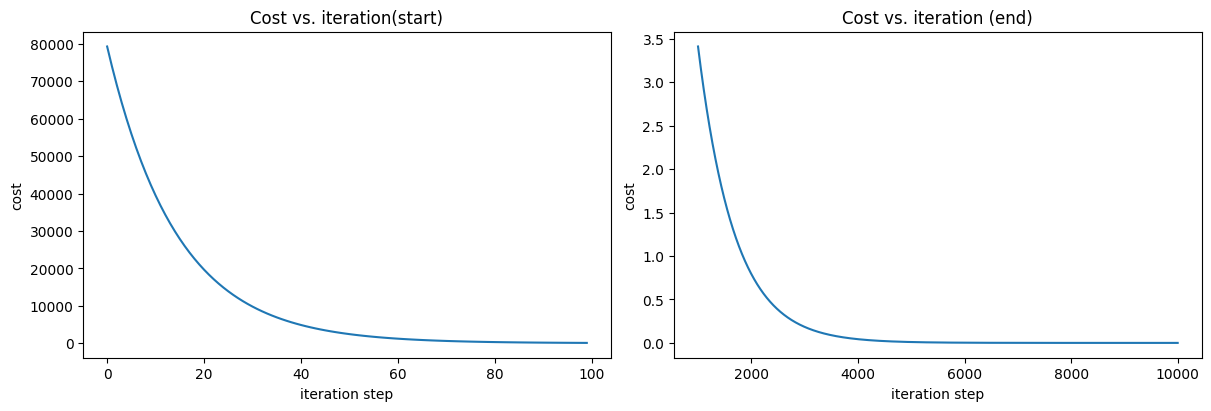

In [81]:
# Plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))

ax1.plot(J_history[:100])
ax2.plot(1000 + np.arange(len(J_history[1000:])), J_history[1000:])

ax1.set_title('Cost vs. iteration(start)'); ax2.set_title('Cost vs. iteration (end)')
ax1.set_xlabel('iteration step');           ax2.set_xlabel('iteration step')
ax1.set_ylabel('cost');                     ax2.set_ylabel('cost')

plt.show()

Text(0, 0.5, 'cost')

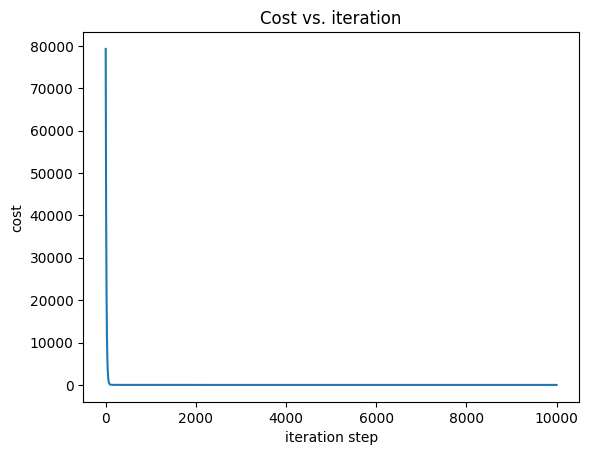

In [82]:
plt.plot(J_history)

plt.title('Cost vs. iteration')
plt.xlabel('iteration step')     
plt.ylabel('cost')          

### Plot the prediction

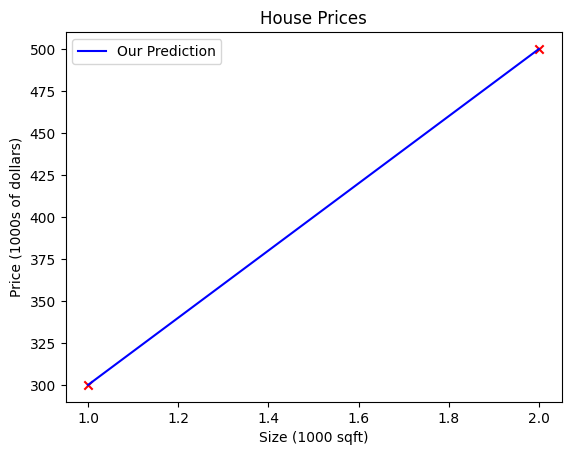

In [83]:
# Plot the model prediction
plt.plot(x_train, w_final * x_train + b_final, c='b', label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title('House Prices')
plt.xlabel('Size (1000 sqft)')
plt.ylabel('Price (1000s of dollars)')

plt.legend()
plt.show()

### Predictions

In [84]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


### Increased learning rate

In [85]:
w_init = 0
b_init = 0
iterations = 10
tmp_alpha = 5.0e-1

w_final, b_final, J_history = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations)

Iteration    0: Cost = 4.33e+04  dJ_dw: -6.500e+02, dJ_db: -4.000e+02   w:  3.250e+02, b: 2.00000e+02
Iteration    1: Cost = 2.20e+04  dJ_dw:  4.625e+02, dJ_db:  2.875e+02   w:  9.375e+01, b: 5.62500e+01
Iteration    2: Cost = 1.12e+04  dJ_dw: -3.312e+02, dJ_db: -2.031e+02   w:  2.594e+02, b: 1.57812e+02
Iteration    3: Cost = 5.72e+03  dJ_dw:  2.352e+02, dJ_db:  1.469e+02   w:  1.418e+02, b: 8.43750e+01
Iteration    4: Cost = 2.92e+03  dJ_dw: -1.689e+02, dJ_db: -1.029e+02   w:  2.263e+02, b: 1.35840e+02
Iteration    5: Cost = 1.49e+03  dJ_dw:  1.194e+02, dJ_db:  7.524e+01   w:  1.666e+02, b: 9.82178e+01
Iteration    6: Cost = 7.62e+02  dJ_dw: -8.629e+01, dJ_db: -5.195e+01   w:  2.097e+02, b: 1.24194e+02
Iteration    7: Cost = 3.92e+02  dJ_dw:  6.054e+01, dJ_db:  3.874e+01   w:  1.794e+02, b: 1.04823e+02
Iteration    8: Cost = 2.03e+02  dJ_dw: -4.419e+01, dJ_db: -2.603e+01   w:  2.015e+02, b: 1.17839e+02
Iteration    9: Cost = 1.06e+02  dJ_dw:  3.057e+01, dJ_db:  2.013e+01   w:  1.862e